In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler



In [2]:
import zipfile,os
# local_zip = '/content/drive/MyDrive/lung_dataset/lung_raw.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/content')
# zip_ref.close()

In [3]:

import splitfolders

splitfolders.ratio('D:/proyek_analisis_data/machine_learning/fruits/Trains', output='D:/proyek_analisis_data/machine_learning/fruits/Trains-splitted', seed=1314, ratio=(.8, .2))



Copying files: 0 files [00:00, ? files/s]

Copying files: 26317 files [02:55, 150.27 files/s]


In [17]:
base_dir = 'D:/proyek_analisis_data/machine_learning/fruits/Trains-splitted'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                   rescale= 1./255,
                   rotation_range=180,
                   width_shift_range=0.2 , 
                   height_shift_range=0.2 ,
                   zoom_range=0.2,
                   horizontal_flip=False,
                   vertical_flip=False,
                   fill_mode = 'nearest'
                   )



test_datagen = ImageDataGenerator(
                    rescale=1./255)

In [11]:
x = 224

train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(x, x),  # mengubah resolusi seluruh gambar menjadi xxx piksel
        batch_size=32,
        # karena ini merupakan masalah klasifikasi 2 kelas, gunakan class_mode = 'categorical'
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(x, x), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32, # karena ini merupakan masalah klasifikasi lebih dari 2 kelas gunakan class_mode = 'categorical'
        class_mode='categorical')



Found 21046 images belonging to 18 classes.
Found 5271 images belonging to 18 classes.


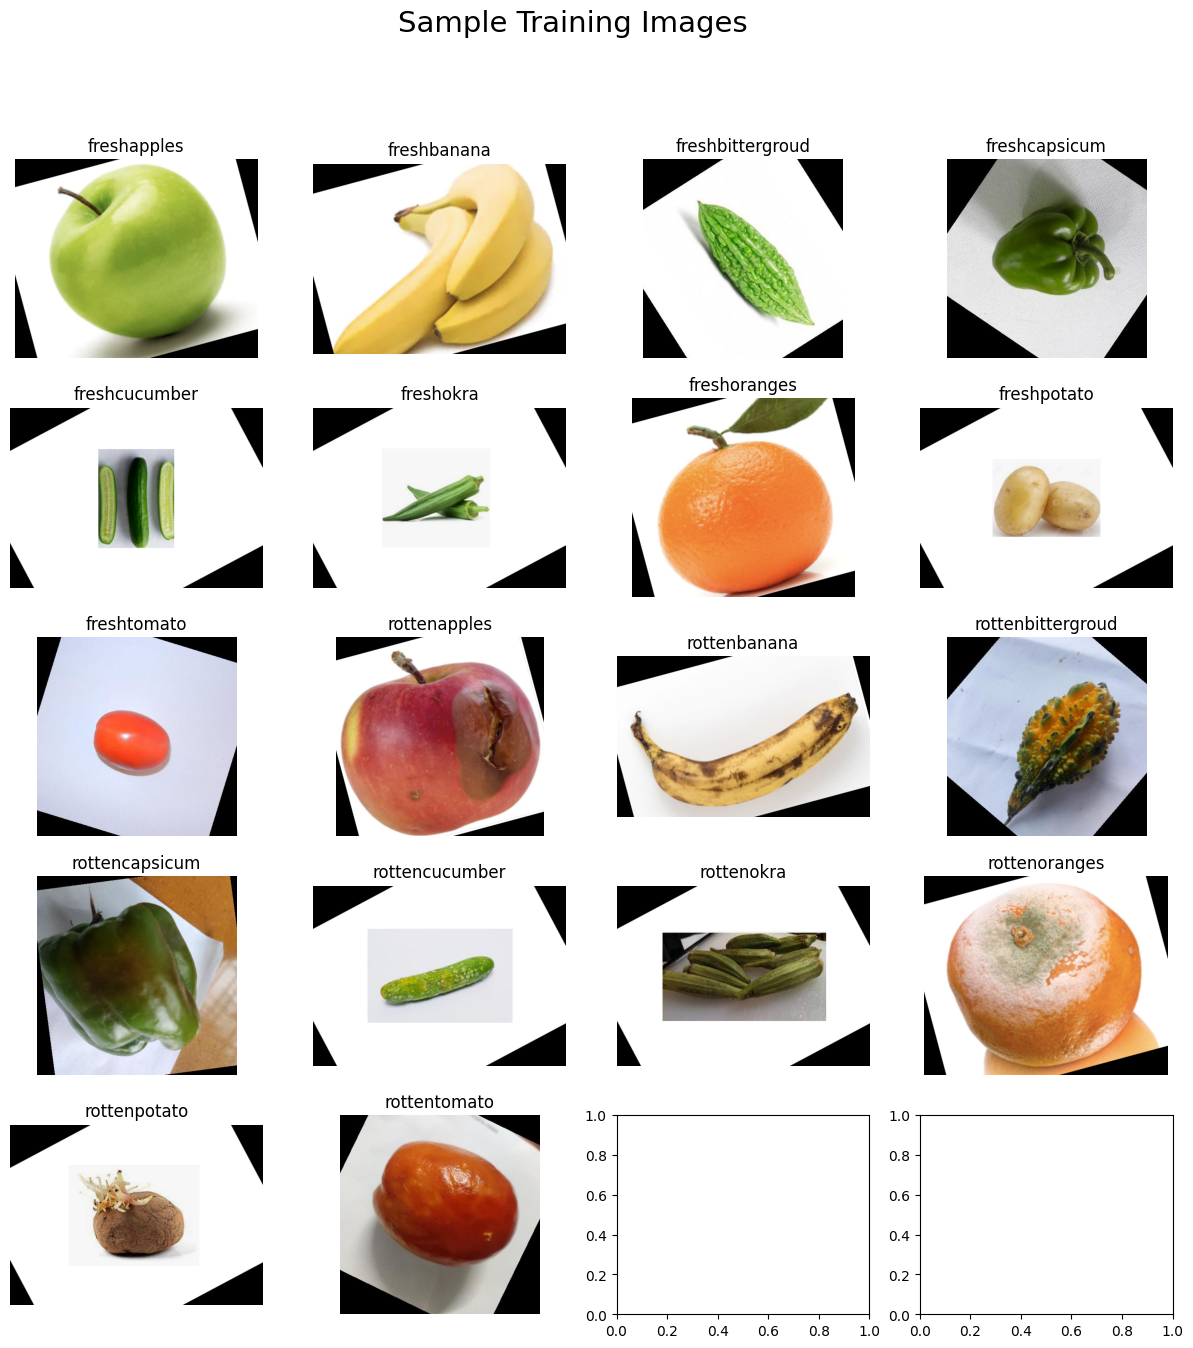

In [27]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Gantilah dengan jalur sesuai dengan struktur direktori Anda


labels = os.listdir(train_dir)
NUM_LABELS = len(labels)

fig, ax = plt.subplots(nrows=NUM_LABELS // 4 + 1, ncols=4, figsize=(15, 3 * (NUM_LABELS // 4 + 1)))
idx = 0

for i in range((NUM_LABELS // 4) + (NUM_LABELS % 4 > 0)):
    for j in range(4):
        if idx < NUM_LABELS:
            label = labels[idx]
            img_path = os.path.join(train_dir, label, os.listdir(os.path.join(train_dir, label))[0])
            img = plt.imread(img_path)
            ax[i, j].set_title(f"{label}")
            ax[i, j].imshow(img)
            ax[i, j].axis("off")
            idx += 1

plt.suptitle("Sample Training Images", fontsize=21)
plt.show()


In [52]:
class_names = list(train_generator.class_indices.keys())

for class_name in class_names:
    print(class_name)

freshapples
freshbanana
freshbittergroud
freshcapsicum
freshcucumber
freshokra
freshoranges
freshpotato
freshtomato
rottenapples
rottenbanana
rottenbittergroud
rottencapsicum
rottencucumber
rottenokra
rottenoranges
rottenpotato
rottentomato


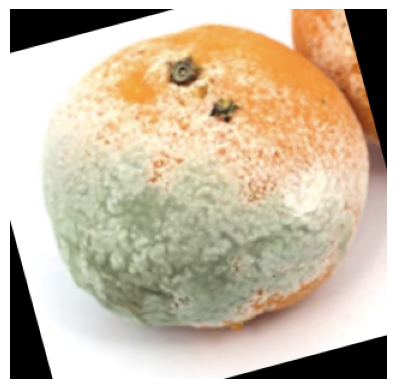

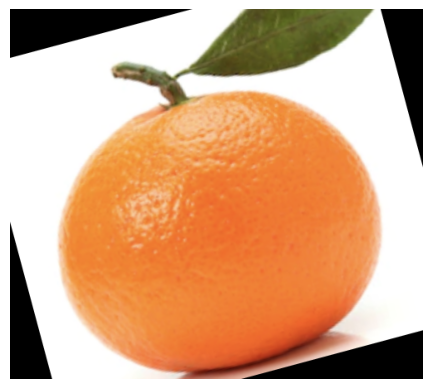

Image Shape -->  (446, 498, 3)
Image Shape -->  (308, 314, 3)


In [78]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
img = load_img('D:\\proyek_analisis_data\\machine_learning\\fruits\\train-split\\train\\freshoranges\\rotated_by_15_Screen Shot 2018-06-12 at 11.50.14 PM.png')
img2 = load_img('D:\\proyek_analisis_data\\machine_learning\\fruits\\train-split\\val\\rottenoranges\\rotated_by_15_Screen Shot 2018-06-12 at 11.19.47 PM.png')
plt.imshow(img2)
plt.axis("off")
plt.show()
plt.imshow(img)
plt.axis("off")
plt.show()
array_image = img_to_array(img)
print("Image Shape --> ", array_image.shape)

from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt


array_image = img_to_array(img2)
print("Image Shape --> ", array_image.shape)

In [33]:
maks = 0.95
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') >= maks and logs.get('val_accuracy') >= maks:
            print("\n Semua ketentuan terpenuhi, dataset memiliki minimal 10000 gambar, resolusi gambar pada dataset tidak seragam. Serta akurasi pada training set dan validation set minimal 92%.")
            self.model.stop_training = True

callbacks = myCallback()


In [29]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import VGG16
# x = 224
# base_model = Xception(weights="imagenet", include_top=False, input_tensor=Input(shape=(x, x, 3)))
base_model = Xception(input_shape = (x, x, 3),
    include_top=False,
    weights="imagenet"
)

for layer in base_model.layers:
    layer.trainable = False

model2 = tf.keras.models.Sequential([
    base_model,
    BatchNormalization(),
    Conv2D(1024, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    GlobalAveragePooling2D(),
    Flatten(),
    BatchNormalization(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(512, activation='selu', kernel_regularizer=l2(0.01)),  # Kurangi dropout rate
    Dense(1024, activation='gelu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),  # Kurangi dropout rate
    Dense(18, activation='softmax')
])
"""60/60 - 176s - loss: 2.8838 - accuracy: 0.8414 - val_loss: 2.7935 - val_accuracy: 0.8469 - 176s/epoch - 3s/step Epoch 17/100 (BEST MODEL)"""

'60/60 - 176s - loss: 2.8838 - accuracy: 0.8414 - val_loss: 2.7935 - val_accuracy: 0.8469 - 176s/epoch - 3s/step Epoch 17/100 (BEST MODEL)'

In [37]:

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)


model2.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


hist2 = model2.fit(
      train_generator,
      steps_per_epoch=60,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=100, # tambahkan epochs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=10, # berapa batch yang akan dieksekusi pada setiap epoch
      callbacks = [callbacks],
      verbose=2)

Epoch 1/100
60/60 - 85s - loss: 0.6168 - accuracy: 0.8964 - val_loss: 0.6657 - val_accuracy: 0.8969 - 85s/epoch - 1s/step
Epoch 2/100
60/60 - 85s - loss: 0.5976 - accuracy: 0.8922 - val_loss: 0.6236 - val_accuracy: 0.8969 - 85s/epoch - 1s/step
Epoch 3/100
60/60 - 76s - loss: 0.4748 - accuracy: 0.9271 - val_loss: 0.4872 - val_accuracy: 0.9250 - 76s/epoch - 1s/step
Epoch 4/100
60/60 - 78s - loss: 0.4891 - accuracy: 0.9141 - val_loss: 0.5189 - val_accuracy: 0.9187 - 78s/epoch - 1s/step
Epoch 5/100
60/60 - 77s - loss: 0.5013 - accuracy: 0.9167 - val_loss: 0.5512 - val_accuracy: 0.8938 - 77s/epoch - 1s/step
Epoch 6/100
60/60 - 78s - loss: 0.5042 - accuracy: 0.9110 - val_loss: 0.4287 - val_accuracy: 0.9344 - 78s/epoch - 1s/step
Epoch 7/100
60/60 - 76s - loss: 0.5231 - accuracy: 0.9125 - val_loss: 0.4895 - val_accuracy: 0.9125 - 76s/epoch - 1s/step
Epoch 8/100
60/60 - 79s - loss: 0.5042 - accuracy: 0.9167 - val_loss: 0.4149 - val_accuracy: 0.9531 - 79s/epoch - 1s/step
Epoch 9/100
60/60 - 76s 

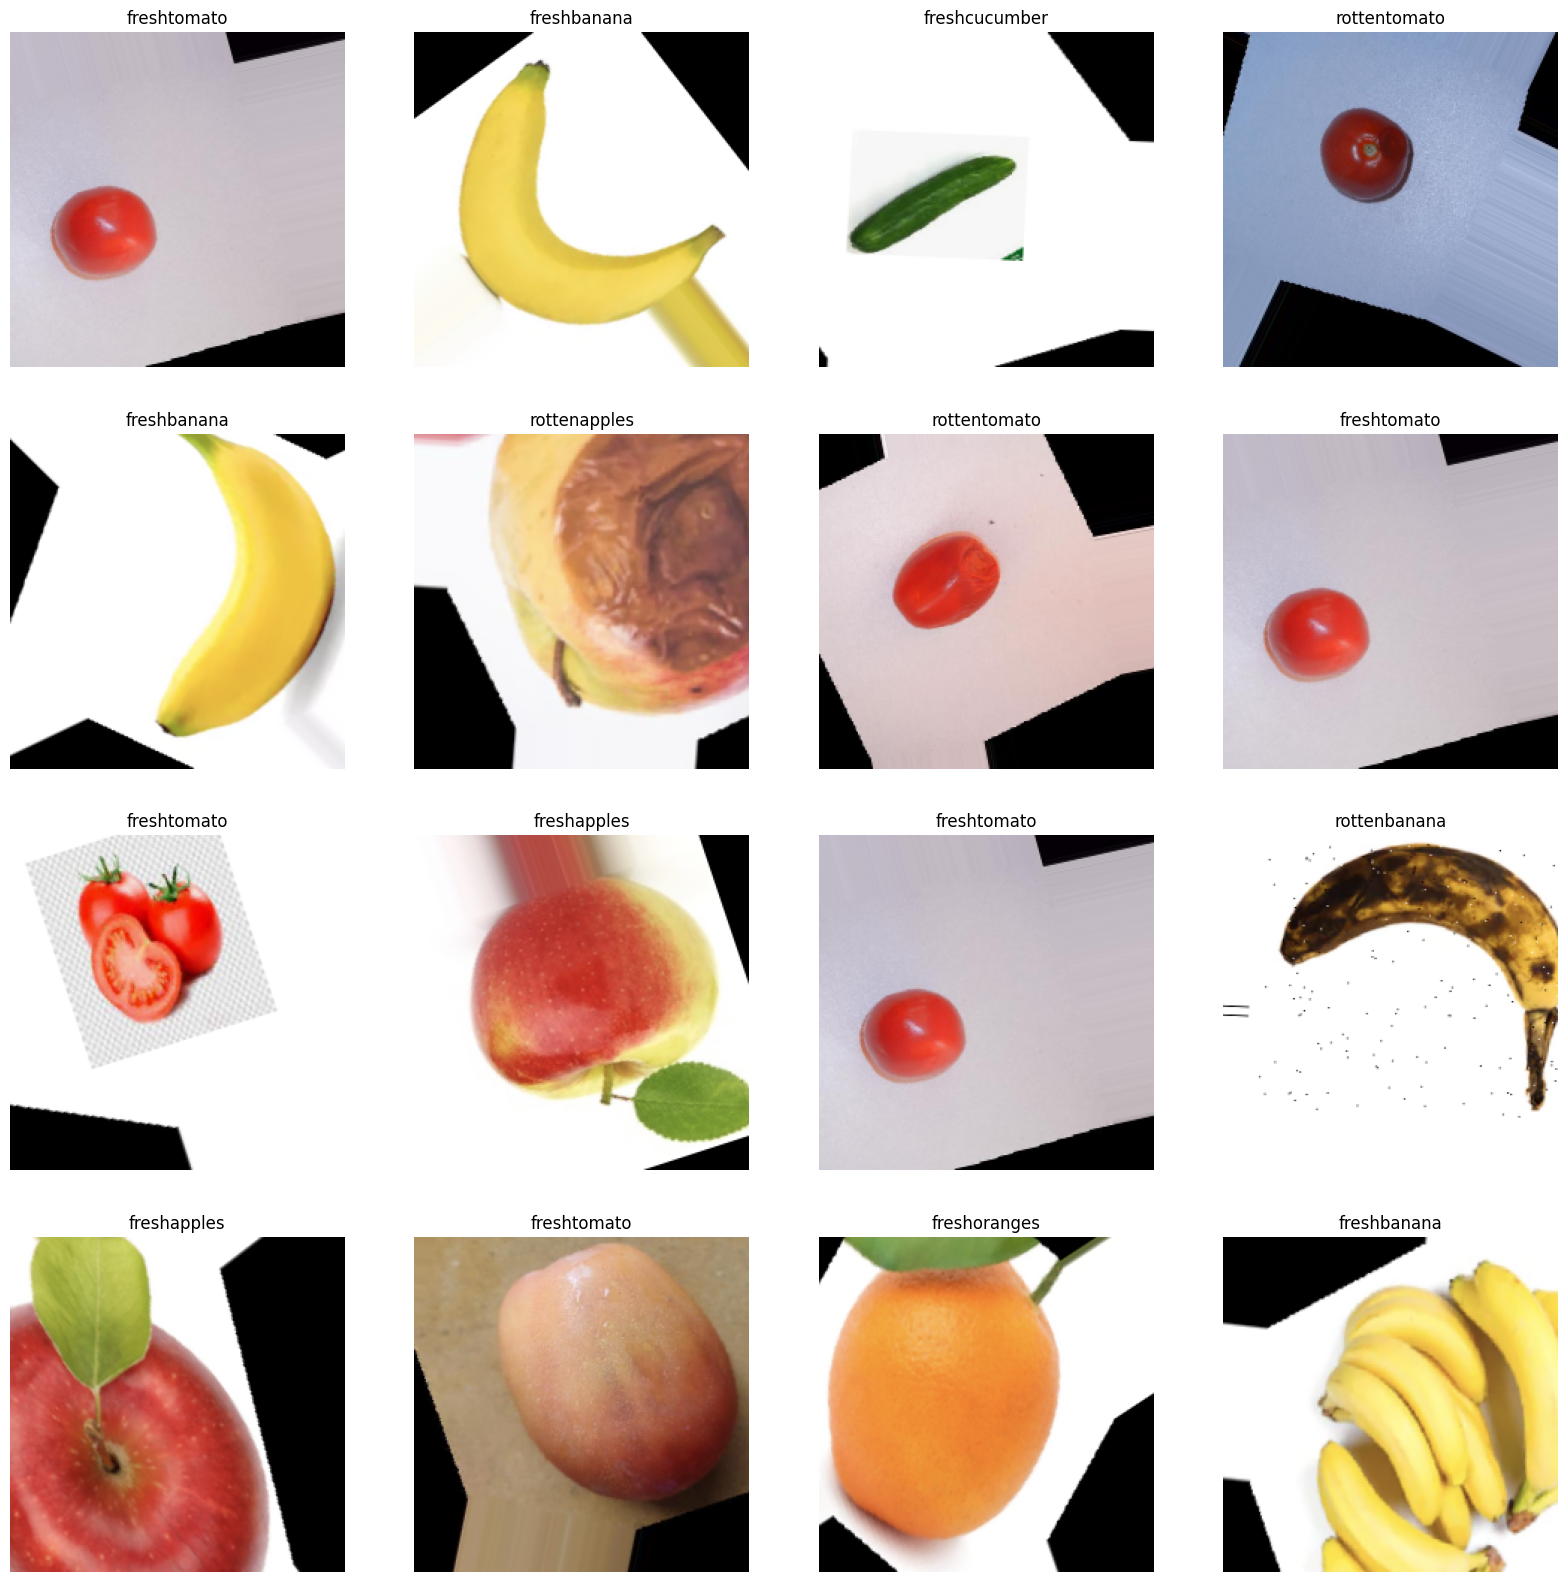

In [47]:
def Show_Images(target_gen):
    batch_images, batch_labels = next(target_gen)

    class_labels = list(target_gen.class_indices.keys())

    plt.figure(figsize=(20, 20))
    for n , i in enumerate(list(np.random.randint(0,len(batch_images),16))):
        plt.subplot(4, 4, n + 1)
        plt.imshow(batch_images[i])
        plt.title(class_labels[np.argmax(batch_labels[i])])
        plt.axis('off')
    plt.show()
Show_Images(train_generator)

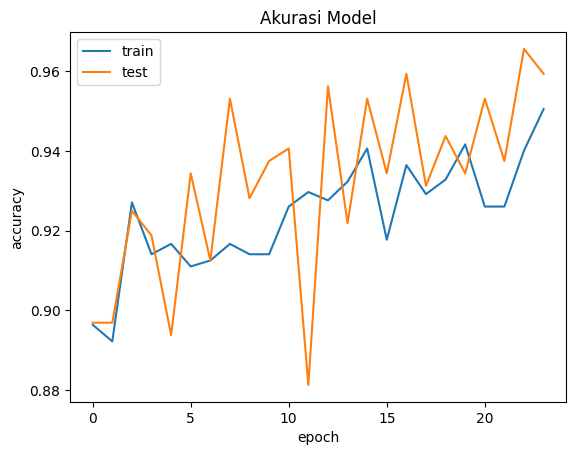

In [41]:
import matplotlib.pyplot as plt
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

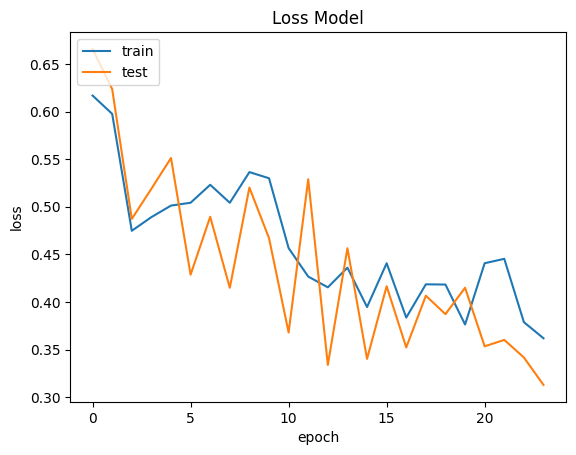

In [49]:
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [50]:
score, acc = model2.evaluate(validation_generator)

165/165 [==============================] - 156s 940ms/step - loss: 0.3339 - accuracy: 0.9467


1/1 [==============================] - 2s 2s/step


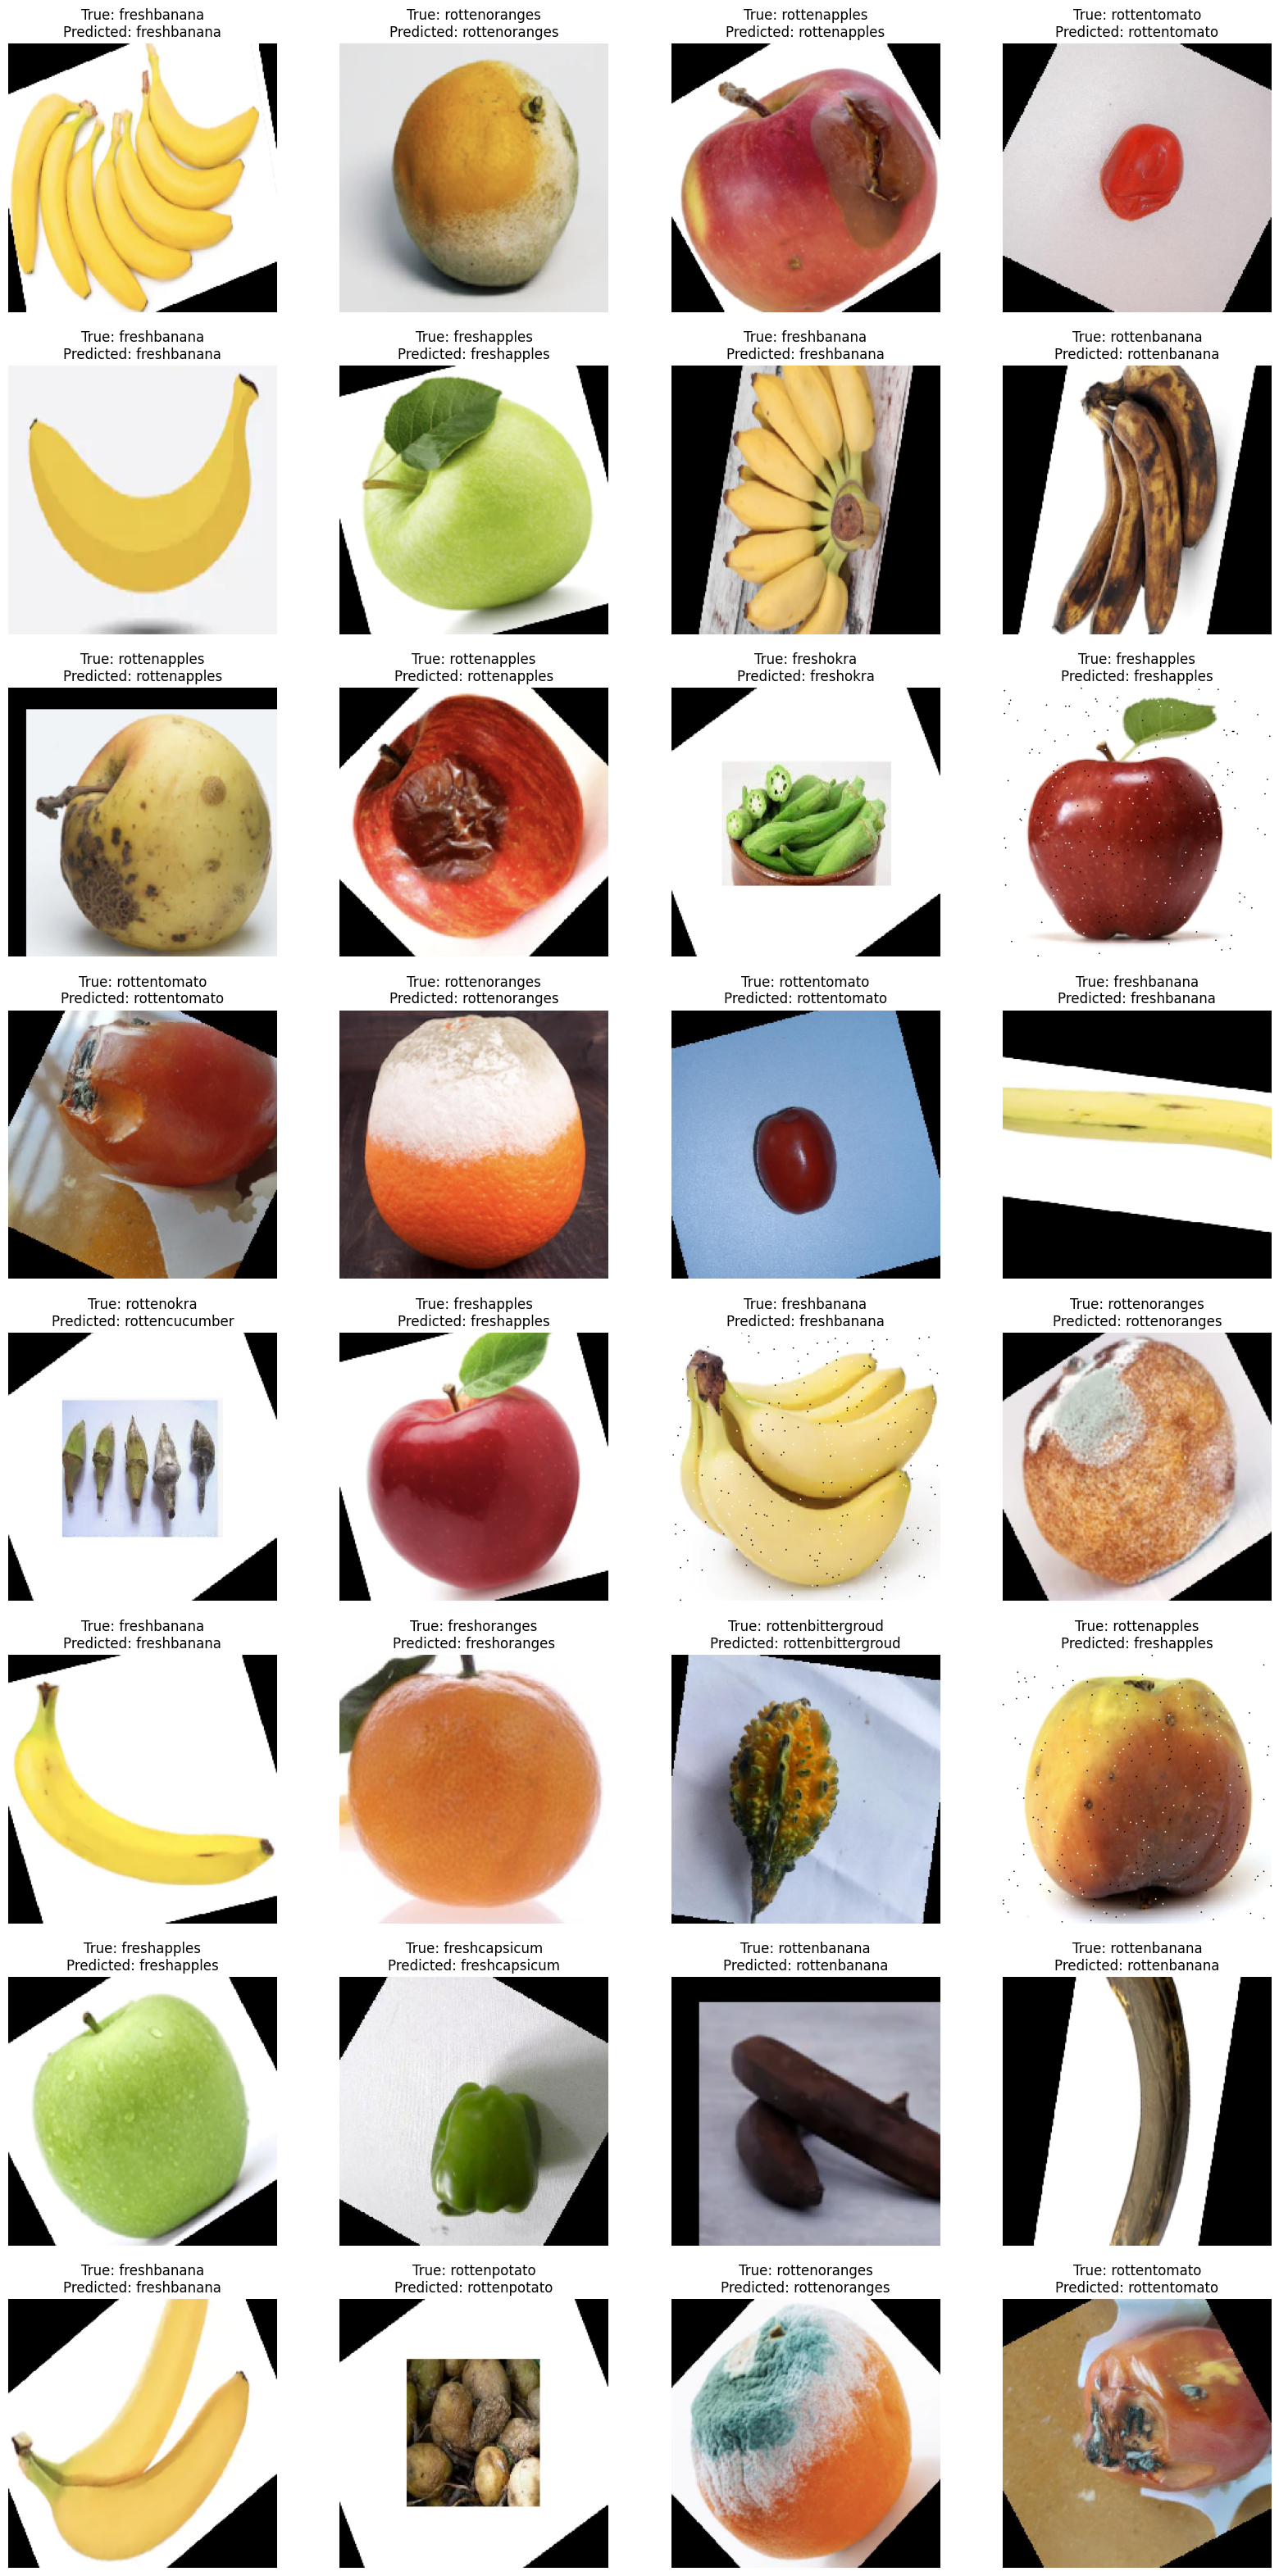

In [51]:
def Show_Images_with_Predictions(target_gen, model, class_names):
    batch_images, batch_labels = next(target_gen)

    class_labels = list(target_gen.class_indices.keys())
    class_names = list(class_names)  

    predictions = model.predict(batch_images)
    predicted_labels = np.argmax(predictions, axis=1)

    num_images = len(batch_images)
    num_rows = num_images // 4 + (num_images % 4 > 0)  
    plt.figure(figsize=(20, 5 * num_rows))

    for n, i in enumerate(range(num_images)):
        true_label = class_labels[np.argmax(batch_labels[i])]
        predicted_label = class_names[predicted_labels[i]]

        plt.subplot(num_rows, 4, n + 1)
        plt.imshow(batch_images[i])
        plt.title(f'True: {true_label}\nPredicted: {predicted_label}')
        plt.axis('off')

    plt.show()

class_names = train_generator.class_indices.keys()

Show_Images_with_Predictions(validation_generator, model2, class_names)

In [ ]:
import pathlib
export_dir = 'saved_model/'
tf.saved_model.save(model2, export_dir)
 
# Convert SavedModel menjadi vegs.tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()
 
tflite_model_file = pathlib.Path('fruits(95%).tflite')
tflite_model_file.write_bytes(tflite_model)